In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from urllib.request import urlretrieve
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'iters-per-timestep': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[8],
                    'nussult-number-nshadow': values[6],
                    'nusult-number': values[7],
                    'flux-combined': values[9],
                    'heat-storage-rate-flux': values[10],
                    'htf-avg-temp': values[11]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'base1.out'  # Replace with your text file path
output_file_path = 'simulation_report_base1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file2= pd.read_csv('simulation_report_base1.csv')

print(f"Data has been written to {output_file_path}")
my_file2
      


Data has been written to simulation_report_base1.csv


,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""area-q""","""pcm-avg-temp""","""iters-per-timestep""","""nusult-number""","""heat-storage-rate""","""nussult-number-nshadow""","""temp-uniformity-index""","""flux-combined""","""heat-storage-rate-flux"""
1,0,0,0,300,10,0,0,0,0,0,0,300.0000000000001
2,1,0.1,0,300.0014559368333,47,1532.475527184208,0.000192557212282165,44.90921989356358,22.45460994678179,-0.001866644311419918,30.75629740324894,302.3752004477129
3,2,0.2,0,300.0054672777745,47,2776.026867864234,0.001106577861081909,78.52314340921797,39.26157170460898,0.002626908793885718,57.71688331693058,304.6772487371032
4,3,0.3,0,300.0095721494073,47,3588.158210672301,0.002280496728285385,98.73620806979491,49.36810403489745,-0.004953730458453265,76.02305242904269,306.1787877455009
...,...,...,...,...,...,...,...,...,...,...,...,...
26326,26325,2632.5,1,352.4955101868293,1,0.03531037054872611,0.4607384264631477,-1607.067953835333,-803.5339769176665,1.372173392744092e-06,0.2082543483741474,352.9936810901014
26327,26326,2632.6,1,352.4956520999597,1,0.03513408050901659,0.4606620813049478,-1607.072718911713,-803.5363594558564,-2.330405676209679e-06,0.2081763492377479,352.9936832298428
26328,26327,2632.7,1,352.4957939623754,1,0.03531907158606875,0.4605857454817088,-1607.130050983656,-803.5650254918281,1.312591431074095e-06,0.2081068732844476,352.9936854071997
26329,26328,2632.8,1,352.4959357741337,1,0.03521415961016775,0.4605094191244711,-1607.128558803515,-803.5642794017574,-2.17234581881276e-06,0.2080302917968028,352.9936875396892


In [3]:

my_file2= my_file2.iloc[1:].reset_index(drop=True)

my_file2['flow-time']= my_file2['flow-time'].astype(float)
my_file2['area-q']= my_file2['area-q'].astype(float)
my_file2['Time Step']= my_file2['Time Step'].astype(float)


my_file2['pcm-avg-temp']= my_file2['pcm-avg-temp'].astype(float)
my_file2['heat-storage-rate']= my_file2['heat-storage-rate'].astype(float)
my_file2['temp-uniformity-index']= my_file2['temp-uniformity-index'].astype(float)
my_file2['nussult-number-nshadow']= my_file2['nussult-number-nshadow'].astype(float)
my_file2['nusult-number']= my_file2['nusult-number'].astype(float)
my_file2['flux-combined']= my_file2['flux-combined'].astype(float)
my_file2['heat-storage-rate-flux']= my_file2['heat-storage-rate-flux'].astype(float)
my_file2['htf-avg-temp']= my_file2['htf-avg-temp'].astype(float)
my_file2= my_file2[my_file2['area-q'] < 1]
my_file2['heat-storage-rate-avg']= my_file2['heat-storage-rate-flux'].cumsum()/my_file2['Time Step']

my_file2

,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.0,300.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN
1,1.0,0.1,0.0,300.001456,47,1532.475527,0.000193,44.909220,22.454610,-0.001867,30.756297,302.375200,30.756297
2,2.0,0.2,0.0,300.005467,47,2776.026868,0.001107,78.523143,39.261572,0.002627,57.716883,304.677249,44.236590
3,3.0,0.3,0.0,300.009572,47,3588.158211,0.002280,98.736208,49.368104,-0.004954,76.023052,306.178788,54.832078
4,4.0,0.4,0.0,300.017278,47,4591.045101,0.005051,120.716283,60.358141,0.004081,99.658314,308.138069,66.038637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23399,23399.0,2339.9,1.0,351.710701,1,0.128040,0.673578,-1458.717464,-729.358732,0.000005,0.684538,352.980405,8.164672
23400,23400.0,2340.0,1.0,351.711166,1,0.127016,0.673510,-1458.785342,-729.392671,-0.000007,0.684242,352.980412,8.164353
23401,23401.0,2340.1,1.0,351.711631,1,0.127880,0.673441,-1458.873835,-729.436918,0.000006,0.683985,352.980420,8.164033
23402,23402.0,2340.2,1.0,351.712096,1,0.126719,0.673372,-1458.944834,-729.472417,-0.000008,0.683687,352.980428,8.163713


In [4]:
my_file2['nusult-numberrr']= my_file2['nussult-number-nshadow'].cumsum()
my_file2

,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp,heat-storage-rate-avg,nusult-numberrr
0,0.0,0.0,0.0,300.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,0.000000e+00
1,1.0,0.1,0.0,300.001456,47,1532.475527,0.000193,44.909220,22.454610,-0.001867,30.756297,302.375200,30.756297,4.490922e+01
2,2.0,0.2,0.0,300.005467,47,2776.026868,0.001107,78.523143,39.261572,0.002627,57.716883,304.677249,44.236590,1.234324e+02
3,3.0,0.3,0.0,300.009572,47,3588.158211,0.002280,98.736208,49.368104,-0.004954,76.023052,306.178788,54.832078,2.221686e+02
4,4.0,0.4,0.0,300.017278,47,4591.045101,0.005051,120.716283,60.358141,0.004081,99.658314,308.138069,66.038637,3.428849e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23399,23399.0,2339.9,1.0,351.710701,1,0.128040,0.673578,-1458.717464,-729.358732,0.000005,0.684538,352.980405,8.164672,-4.238214e+07
23400,23400.0,2340.0,1.0,351.711166,1,0.127016,0.673510,-1458.785342,-729.392671,-0.000007,0.684242,352.980412,8.164353,-4.238360e+07
23401,23401.0,2340.1,1.0,351.711631,1,0.127880,0.673441,-1458.873835,-729.436918,0.000006,0.683985,352.980420,8.164033,-4.238506e+07
23402,23402.0,2340.2,1.0,351.712096,1,0.126719,0.673372,-1458.944834,-729.472417,-0.000008,0.683687,352.980428,8.163713,-4.238652e+07


In [5]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by42.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by41.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file3= pd.read_csv('simulation_report_1by41.csv')

print(f"Data has been written to {output_file_path}")
my_file3
      


Data has been written to simulation_report_1by41.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,300.0000000000006,0,0,0,0,300.0000000000002
2,1,0.1,0,300.0031850878341,54.05224080182032,0.0006569701710681854,39.42303524679789,-3.15240066726119e-05,303.4996153238331
3,2,0.2,0,300.0119890785269,104.1716302542631,0.00280478064673257,15.78467587746227,-0.0003324141972029793,306.8472918504775
4,3,0.3,0,300.0210102403209,139.807287371328,0.005204923421249771,15.89251066628448,0.0005241018301092026,309.0068607724336
...,...,...,...,...,...,...,...,...,...
26826,26825,2682.5,1,351.5890741961039,0.6605868352737889,1.085739545994292,17.81326233834755,6.582283029299418e-06,352.9832677644096
26827,26826,2682.6,1,351.5895209533465,0.6603405601095726,1.085618632254858,17.81326189485245,6.068748054310902e-06,352.9832735898438
26828,26827,2682.7,1,351.5899675480388,0.6600989846721945,1.085497721401846,17.81326142657103,6.57534826287165e-06,352.9832794221637
26829,26828,2682.8,1,351.5904139836707,0.6598528649876643,1.085376809239752,17.81326097095216,6.073911575144031e-06,352.9832852455649


In [6]:

my_file3= my_file3.iloc[1:].reset_index(drop=True)

my_file3['flow-time']= my_file3['flow-time'].astype(float)
my_file3['area-q']= my_file3['area-q'].astype(float)


my_file3['pcm-avg-temp']= my_file3['pcm-avg-temp'].astype(float)
my_file3['heat-storage-rate']= my_file3['heat-storage-rate'].astype(float)
my_file3['temp-uniformity-index']= my_file3['temp-uniformity-index'].astype(float)
my_file3['nusult-number']= my_file3['nusult-number'].astype(float)
my_file3['flux-combined']= my_file3['flux-combined'].astype(float)
my_file3['htf-avg-temp']= my_file3['htf-avg-temp'].astype(float)
my_file3= my_file3[my_file3['area-q'] < 1]
my_file3['Time Step']= my_file3['Time Step'].astype(float)
my_file3['heat-storage-rate-avg']= my_file3['heat-storage-rate'].cumsum()/my_file3['Time Step']
my_file3['nusult-numberr']= my_file3['nusult-number'].cumsum()/my_file3['Time Step']

my_file3

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,nusult-numberr
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,NaN
1,1.0,0.1,0.000000e+00,300.003185,54.052241,0.000657,39.423035,-0.000032,303.499615,54.052241,39.423035
2,2.0,0.2,0.000000e+00,300.011989,104.171630,0.002805,15.784676,-0.000332,306.847292,79.111936,27.603856
3,3.0,0.3,0.000000e+00,300.021010,139.807287,0.005205,15.892511,0.000524,309.006861,99.343719,23.700074
4,4.0,0.4,2.010026e-08,300.038044,190.104007,0.010145,16.194605,0.000414,311.784175,122.033791,21.823707
...,...,...,...,...,...,...,...,...,...,...,...
26643,26643.0,2664.3,1.000000e+00,351.504976,0.705869,1.108206,17.813357,0.000007,352.982187,7.609337,17.820206
26644,26644.0,2664.4,1.000000e+00,351.505454,0.705613,1.108079,17.813357,0.000006,352.982193,7.609078,17.820206
26645,26645.0,2664.5,1.000000e+00,351.505931,0.705362,1.107951,17.813356,0.000007,352.982199,7.608819,17.820206
26646,26646.0,2664.6,1.000000e+00,351.506408,0.705107,1.107824,17.813356,0.000006,352.982205,7.608560,17.820205


In [7]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'c2.out'  # Replace with your text file path
output_file_path = 'simulation_report_c1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file4= pd.read_csv('simulation_report_c1.csv')

print(f"Data has been written to {output_file_path}")
my_file4
      


Data has been written to simulation_report_c1.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999998,0,0,0,0,299.9999999999996
2,1,0.1,0,300.0009070399414,-21.81102803683363,0.009566152621013025,15.64115828084126,0.000109408207613626,302.4535409927312
3,2,0.2,0,300.0035437109772,-40.95883680137728,0.03400390244844909,3.207454984163868,-0.00025346043148744,304.8574728852691
4,3,0.3,0,300.0063400356426,-55.48698053782268,0.05773532780464687,3.31382823708508,-2.917130220936315e-05,306.435229977335
...,...,...,...,...,...,...,...,...,...
36222,36221,3622.1,1,352.9653833114463,-0.01145402487477436,0.04218510753003531,3.439021727077945,7.267421381698669e-09,352.9996395549324
36223,36222,3622.2,1,352.965391054523,-0.01145137143726032,0.04217687664564186,3.439122126870641,7.353562543610526e-09,352.9996396367257
36224,36223,3622.3,1,352.9653987958116,-0.01144871484518041,0.0421686462251958,3.439188926614145,7.342698560286465e-09,352.9996397185075
36225,36224,3622.4,1,352.9654065352992,-0.01144606317803224,0.04216041764959232,3.439209478870299,7.011964838626872e-09,352.999639800243


In [8]:

my_file4= my_file4.iloc[1:].reset_index(drop=True)

my_file4['flow-time']= my_file4['flow-time'].astype(float)
my_file4['area-q']= my_file4['area-q'].astype(float)


my_file4['pcm-avg-temp']= my_file4['pcm-avg-temp'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate']*(-1)
my_file4['temp-uniformity-index']= my_file4['temp-uniformity-index'].astype(float)
my_file4['nusult-number']= my_file4['nusult-number'].astype(float)
my_file4['flux-combined']= my_file4['flux-combined'].astype(float)
my_file4['htf-avg-temp']= my_file4['htf-avg-temp'].astype(float)
my_file4= my_file4[my_file4['area-q'] < 1]
my_file4['Time Step']= my_file4['Time Step'].astype(float)
my_file4['heat-storage-rate-avg']= my_file4['heat-storage-rate'].cumsum()/my_file4['Time Step']

my_file4

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.0,300.000000,-0.000000,0.000000,0.000000,0.000000e+00,300.000000,NaN
1,1.0,0.1,0.0,300.000907,21.811028,0.009566,15.641158,1.094082e-04,302.453541,21.811028
2,2.0,0.2,0.0,300.003544,40.958837,0.034004,3.207455,-2.534604e-04,304.857473,31.384932
3,3.0,0.3,0.0,300.006340,55.486981,0.057735,3.313828,-2.917130e-05,306.435230,39.418948
4,4.0,0.4,0.0,300.011861,78.052634,0.099791,3.435479,7.955652e-05,308.500279,49.077370
...,...,...,...,...,...,...,...,...,...,...
22658,22658.0,2265.8,1.0,351.596395,0.794258,0.387836,3.441085,7.177199e-07,352.978768,8.775040
22659,22659.0,2265.9,1.0,351.596930,0.793940,0.387796,3.441156,7.776135e-07,352.978776,8.774688
22660,22660.0,2266.0,1.0,351.597466,0.793625,0.387755,3.441200,7.149948e-07,352.978785,8.774335
22661,22661.0,2266.1,1.0,351.598001,0.793308,0.387714,3.441229,7.674570e-07,352.978793,8.773983


In [9]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by32.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by31.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file5= pd.read_csv('simulation_report_1by31.csv')

print(f"Data has been written to {output_file_path}")
my_file5
      


Data has been written to simulation_report_1by31.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999999,0,0,0,0,299.9999999999999
2,1,0.1,0,300.0020656626405,38.9285799381226,0.000306674139961189,29.3796026925197,-0.0002988662035292577,303.1382613823996
3,2,0.2,0,300.0077356638265,74.02111138953927,0.001046041185502076,9.476816332025189,-0.0001956626615537971,306.1802715455848
4,3,0.3,0,300.0135380331832,99.192341925897,0.001767802494256182,9.532879710961344,0.0004283003930822815,308.1624764326409
...,...,...,...,...,...,...,...,...,...
25658,25657,2565.7,1,351.6299325278829,0.6785215370219859,0.9376011250017239,10.72926299128192,-8.430792604374737e-06,352.9827969430008
25659,25658,2565.8,1,351.6303912396079,0.6782550887588386,0.9374984324120539,10.72926235371385,-7.949492506265088e-06,352.9828033741401
25660,25659,2565.9,1,351.6308497594931,0.6779851861598059,0.9373957794048954,10.72926174937082,-8.422108807248918e-06,352.982809813094
25661,25660,2566,1,351.6313080846249,0.6777189198544734,0.9372931660475929,10.72926118084141,-7.942072028588321e-06,352.9828162412899


In [10]:

my_file5= my_file5.iloc[1:].reset_index(drop=True)

my_file5['flow-time']= my_file5['flow-time'].astype(float)
my_file5['area-q']= my_file5['area-q'].astype(float)


my_file5['pcm-avg-temp']= my_file5['pcm-avg-temp'].astype(float)
my_file5['heat-storage-rate']= my_file5['heat-storage-rate'].astype(float)
my_file5['temp-uniformity-index']= my_file5['temp-uniformity-index'].astype(float)
my_file5['nusult-number']= my_file5['nusult-number'].astype(float)
my_file5['flux-combined']= my_file5['flux-combined'].astype(float)
my_file5['htf-avg-temp']= my_file5['htf-avg-temp'].astype(float)
my_file5= my_file5[my_file5['area-q'] < 1]
my_file5['Time Step']= my_file5['Time Step'].astype(float)
my_file5['heat-storage-rate-avg']= my_file5['heat-storage-rate'].cumsum()/my_file5['Time Step']

my_file5

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.0,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN
1,1.0,0.1,0.0,300.002066,38.928580,0.000307,29.379603,-0.000299,303.138261,38.928580
2,2.0,0.2,0.0,300.007736,74.021111,0.001046,9.476816,-0.000196,306.180272,56.474846
3,3.0,0.3,0.0,300.013538,99.192342,0.001768,9.532880,0.000428,308.162476,70.714011
4,4.0,0.4,0.0,300.024532,135.999612,0.003102,9.808661,0.000752,310.737827,87.035411
...,...,...,...,...,...,...,...,...,...,...
25584,25584.0,2558.4,1.0,351.595958,0.698272,0.945171,10.729301,-0.000008,352.982323,7.858927
25585,25585.0,2558.5,1.0,351.596429,0.697998,0.945066,10.729300,-0.000009,352.982330,7.858647
25586,25586.0,2558.6,1.0,351.596900,0.697727,0.944962,10.729300,-0.000008,352.982336,7.858367
25587,25587.0,2558.7,1.0,351.597371,0.697452,0.944857,10.729299,-0.000009,352.982343,7.858087


In [11]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by52.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by51.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file6= pd.read_csv('simulation_report_1by51.csv')

print(f"Data has been written to {output_file_path}")
my_file6
      


Data has been written to simulation_report_1by51.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999998,0,0,0,0,299.9999999999995
2,1,0.1,0,300.0039913644436,64.96027859606933,0.002350125978205268,38.8942201565478,-1.645571433073201e-05,303.8577372750224
3,2,0.2,0,300.0148942617803,126.7930864905541,0.009927214425764327,16.47449761734647,-0.0002354209182158229,307.5298459839799
4,3,0.3,0,300.0260079411229,170.0886427980588,0.01798811425008304,16.67917081606543,0.0002329581010940274,309.8909943013851
...,...,...,...,...,...,...,...,...,...
27344,27343,2734.3,1,352.3789144639256,0.2512233655665472,0.6294790612252205,18.65040714650475,1.54970020765921e-06,352.9939005022716
27345,27344,2734.4,1,352.379087795357,0.2511333402358906,0.6293663676795502,18.65040695004243,1.581314266974054e-06,352.9939026232621
27346,27345,2734.5,1,352.3792610642981,0.2510432180608781,0.6292536907213236,18.65040675364784,1.537698650300179e-06,352.9939047420871
27347,27346,2734.6,1,352.3794342707996,0.2509530517208998,0.629141030347888,18.65040655732113,1.568665007223302e-06,352.9939068599155


In [12]:

my_file6= my_file6.iloc[1:].reset_index(drop=True)

my_file6['flow-time']= my_file6['flow-time'].astype(float)
my_file6['area-q']= my_file6['area-q'].astype(float)


my_file6['pcm-avg-temp']= my_file6['pcm-avg-temp'].astype(float)
my_file6['heat-storage-rate']= my_file6['heat-storage-rate'].astype(float)
my_file6['temp-uniformity-index']= my_file6['temp-uniformity-index'].astype(float)
my_file6['nusult-number']= my_file6['nusult-number'].astype(float)
my_file6['flux-combined']= my_file6['flux-combined'].astype(float)
my_file6['htf-avg-temp']= my_file6['htf-avg-temp'].astype(float)
my_file6= my_file6[my_file6['area-q'] < 1]
my_file6['Time Step']= my_file6['Time Step'].astype(float)
my_file6['heat-storage-rate-avg']= my_file6['heat-storage-rate'].cumsum()/my_file6['Time Step']

my_file6

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN
1,1.0,0.1,0.000000e+00,300.003991,64.960279,0.002350,38.894220,-0.000016,303.857737,64.960279
2,2.0,0.2,0.000000e+00,300.014894,126.793086,0.009927,16.474498,-0.000235,307.529846,95.876683
3,3.0,0.3,0.000000e+00,300.026008,170.088643,0.017988,16.679171,0.000233,309.890994,120.614003
4,4.0,0.4,1.527484e-07,300.046869,229.523704,0.033381,17.162441,0.000307,312.918702,147.841428
...,...,...,...,...,...,...,...,...,...,...
24769,24769.0,2476.9,1.000000e+00,351.611767,0.693643,0.922152,18.651173,0.000005,352.983950,8.020879
24770,24770.0,2477.0,1.000000e+00,351.612246,0.693375,0.922053,18.651173,0.000005,352.983956,8.020583
24771,24771.0,2477.1,1.000000e+00,351.612724,0.693110,0.921954,18.651172,0.000005,352.983961,8.020287
24772,24772.0,2477.2,1.000000e+00,351.613202,0.692842,0.921855,18.651172,0.000005,352.983967,8.019992


In [13]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by62.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by61.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file7= pd.read_csv('simulation_report_1by61.csv')

print(f"Data has been written to {output_file_path}")
my_file7
      


Data has been written to simulation_report_1by61.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999997,0,0,0,0,300
2,1,0.1,0,300.0045451173781,77.9693253395554,0.001046680915068006,45.66796006547457,-6.77759122140742e-05,304.161492375539
3,2,0.2,0,300.0172317592194,152.6958496050106,0.004628276470253719,21.07004246059664,-0.0001043684613932783,308.0888677105625
4,3,0.3,0,300.0302215546357,203.6874067302639,0.00863789826376272,21.33080093142004,0.0004752307035005288,310.5995833253066
...,...,...,...,...,...,...,...,...,...
29998,29997,2999.7,1,352.743896337517,0.08700447696540652,0.3241633003265775,23.09769148395182,3.729785719580603e-07,352.9979268123902
29999,29998,2999.8,1,352.7439557430236,0.08698039959750371,0.3241025626686705,23.09769093023729,4.182342688979768e-07,352.9979273793438
30000,29999,2999.9,1,352.7440151321043,0.08695607827487993,0.3240418365739792,23.09768885251487,3.728248545997737e-07,352.9979279465039
30001,30000,3000,1,352.7440745049503,0.0869320180219689,0.3239811220040899,23.09768493190599,4.18074449809458e-07,352.9979285130648


In [14]:

my_file7= my_file7.iloc[1:].reset_index(drop=True)

my_file7['flow-time']= my_file7['flow-time'].astype(float)
my_file7['area-q']= my_file7['area-q'].astype(float)


my_file7['pcm-avg-temp']= my_file7['pcm-avg-temp'].astype(float)
my_file7['heat-storage-rate']= my_file7['heat-storage-rate'].astype(float)
my_file7['temp-uniformity-index']= my_file7['temp-uniformity-index'].astype(float)
my_file7['nusult-number']= my_file7['nusult-number'].astype(float)
my_file7['flux-combined']= my_file7['flux-combined'].astype(float)
my_file7['htf-avg-temp']= my_file7['htf-avg-temp'].astype(float)
my_file7= my_file7[my_file7['area-q'] < 1]
my_file7['Time Step']= my_file7['Time Step'].astype(float)
my_file7['heat-storage-rate-avg']= my_file7['heat-storage-rate'].cumsum()/my_file7['Time Step']

my_file7

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN
1,1.0,0.1,0.000000e+00,300.004545,77.969325,0.001047,45.667960,-0.000068,304.161492,77.969325
2,2.0,0.2,0.000000e+00,300.017232,152.695850,0.004628,21.070042,-0.000104,308.088868,115.332587
3,3.0,0.3,0.000000e+00,300.030222,203.687407,0.008638,21.330801,0.000475,310.599583,144.784194
4,4.0,0.4,9.481169e-08,300.054595,271.479013,0.016799,21.884974,0.000682,313.801953,176.457899
...,...,...,...,...,...,...,...,...,...,...
24377,24377.0,2437.7,1.000000e+00,351.776925,0.607416,0.897994,23.098716,0.000006,352.986472,8.252494
24378,24378.0,2437.8,1.000000e+00,351.777339,0.607176,0.897888,23.098719,0.000006,352.986477,8.252180
24379,24379.0,2437.9,1.000000e+00,351.777753,0.606934,0.897782,23.098720,0.000006,352.986482,8.251867
24380,24380.0,2438.0,1.000000e+00,351.778167,0.606694,0.897676,23.098721,0.000006,352.986487,8.251553


In [15]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '1by22.out'  # Replace with your text file path
output_file_path = 'simulation_report_1by21.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file8= pd.read_csv('simulation_report_1by21.csv')

print(f"Data has been written to {output_file_path}")
my_file8
      


Data has been written to simulation_report_1by21.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999999,0,0,0,0,299.9999999999998
2,1,0.1,0,300.0017315224518,33.21746672919965,0.000225454740231128,21.85808695546027,-0.0001068979079477117,303.1848678384052
3,2,0.2,0,300.0064339465781,62.67089232184919,0.001087061556690677,6.355502100383355,-0.000111538217765883,306.2932995889466
4,3,0.3,0,300.011288490775,85.18785471443717,0.002071022297759115,6.561801321255273,4.263561972095431e-05,308.3266172565069
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.8052416342648,0.06825895612008459,0.1850635188131158,7.356794522170035,-5.833932689852661e-07,352.9981636206025
29998,29997,2999.7,1,352.8052881124796,0.06824020347879577,0.185035524331628,7.356794437446815,-4.839070525258782e-07,352.9981641335033
29999,29998,2999.8,1,352.8053345774111,0.0682198573332839,0.1850075334010693,7.356794359984901,-5.988510519971957e-07,352.9981646449282
30000,29999,2999.9,1,352.8053810290172,0.06820110785799469,0.1849795463377223,7.356794280533612,-4.896422442224324e-07,352.9981651573873


In [16]:

my_file8= my_file8.iloc[1:].reset_index(drop=True)

my_file8['flow-time']= my_file8['flow-time'].astype(float)
my_file8['area-q']= my_file8['area-q'].astype(float)


my_file8['pcm-avg-temp']= my_file8['pcm-avg-temp'].astype(float)
my_file8['heat-storage-rate']= my_file8['heat-storage-rate'].astype(float)
my_file8['temp-uniformity-index']= my_file8['temp-uniformity-index'].astype(float)
my_file8['nusult-number']= my_file8['nusult-number'].astype(float)
my_file8['flux-combined']= my_file8['flux-combined'].astype(float)
my_file8['htf-avg-temp']= my_file8['htf-avg-temp'].astype(float)
my_file8= my_file8[my_file8['area-q'] < 1]
my_file8['Time Step']= my_file8['Time Step'].astype(float)
my_file8['heat-storage-rate-avg']= my_file8['heat-storage-rate'].cumsum()/my_file8['Time Step']

my_file8

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.0,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN
1,1.0,0.1,0.0,300.001732,33.217467,0.000225,21.858087,-0.000107,303.184868,33.217467
2,2.0,0.2,0.0,300.006434,62.670892,0.001087,6.355502,-0.000112,306.293300,47.944180
3,3.0,0.3,0.0,300.011288,85.187855,0.002071,6.561801,0.000043,308.326617,60.358738
4,4.0,0.4,0.0,300.020653,120.136838,0.004089,6.887961,0.000161,310.976950,75.303263
...,...,...,...,...,...,...,...,...,...,...
23917,23917.0,2391.7,1.0,351.807123,0.668400,0.364764,7.358132,-0.000006,352.983263,8.325747
23918,23918.0,2391.8,1.0,351.807577,0.668100,0.364744,7.358131,-0.000009,352.983270,8.325427
23919,23919.0,2391.9,1.0,351.808030,0.667831,0.364725,7.358131,-0.000006,352.983277,8.325107
23920,23920.0,2392.0,1.0,351.808483,0.667531,0.364706,7.358130,-0.000010,352.983284,8.324787


In [17]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 's2.out'  # Replace with your text file path
output_file_path = 'simulation_report_s2.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file9= pd.read_csv('simulation_report_s2.csv')

print(f"Data has been written to {output_file_path}")
my_file9
      


Data has been written to simulation_report_s2.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999997,0,0,0,0,299.9999999999999
2,1,0.1,0,300.0015040355397,29.72749127031409,0.0005235454853606495,21.14036803513313,3.231349799293071e-05,302.8083254158255
3,2,0.2,0,300.0057653377604,55.91698403815165,0.002832753710017055,5.803771801823603,-0.0001342809030617786,305.5439726408951
4,3,0.3,0,300.0102253712798,75.89619027233071,0.005558709000983017,5.975202118777751,-0.0002650935583545788,307.3310177701928
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.8150116106121,0.06515269098458776,0.2047679598139326,6.180391421999558,-1.535175810224443e-07,352.9980094724615
29998,29997,2999.7,1,352.8150559025831,0.0651344767961428,0.2047317054376435,6.180391323628206,-1.313091073096295e-07,352.9980100101822
29999,29998,2999.8,1,352.8151001821735,0.06511625474297261,0.2046954567966928,6.18039122527784,-1.533864449065891e-07,352.9980105476519
30000,29999,2999.9,1,352.8151444493882,0.06509805309881624,0.2046592144985049,6.180391126948459,-1.312007146814231e-07,352.9980110850147


In [18]:

my_file9= my_file9.iloc[1:].reset_index(drop=True)

my_file9['flow-time']= my_file9['flow-time'].astype(float)
my_file9['area-q']= my_file9['area-q'].astype(float)


my_file9['pcm-avg-temp']= my_file9['pcm-avg-temp'].astype(float)
my_file9['heat-storage-rate']= my_file9['heat-storage-rate'].astype(float)
my_file9['temp-uniformity-index']= my_file9['temp-uniformity-index'].astype(float)
my_file9['nusult-number']= my_file9['nusult-number'].astype(float)
my_file9['flux-combined']= my_file9['flux-combined'].astype(float)
my_file9['htf-avg-temp']= my_file9['htf-avg-temp'].astype(float)
my_file9= my_file9[my_file9['area-q'] < 1]
my_file9['Time Step']= my_file9['Time Step'].astype(float)
my_file9['heat-storage-rate-avg']= my_file9['heat-storage-rate'].cumsum()/my_file9['Time Step']

my_file9

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg
0,0.0,0.0,0.0,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN
1,1.0,0.1,0.0,300.001504,29.727491,0.000524,21.140368,0.000032,302.808325,29.727491
2,2.0,0.2,0.0,300.005765,55.916984,0.002833,5.803772,-0.000134,305.543973,42.822238
3,3.0,0.3,0.0,300.010225,75.896190,0.005559,5.975202,-0.000265,307.331018,53.846889
4,4.0,0.4,0.0,300.018862,105.420148,0.011245,6.144508,-0.000312,309.659374,66.740203
...,...,...,...,...,...,...,...,...,...,...
23752,23752.0,2375.2,1.0,351.833566,0.655394,0.498408,6.181790,-0.000002,352.981547,8.401332
23753,23753.0,2375.3,1.0,351.834011,0.655102,0.498374,6.181790,-0.000002,352.981555,8.401006
23754,23754.0,2375.4,1.0,351.834455,0.654811,0.498339,6.181789,-0.000002,352.981563,8.400680
23755,23755.0,2375.5,1.0,351.834900,0.654519,0.498305,6.181789,-0.000002,352.981571,8.400354


C:\Users\HP\AppData\Local\Temp\ipykernel_21736\692208775.py:64: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 3000)


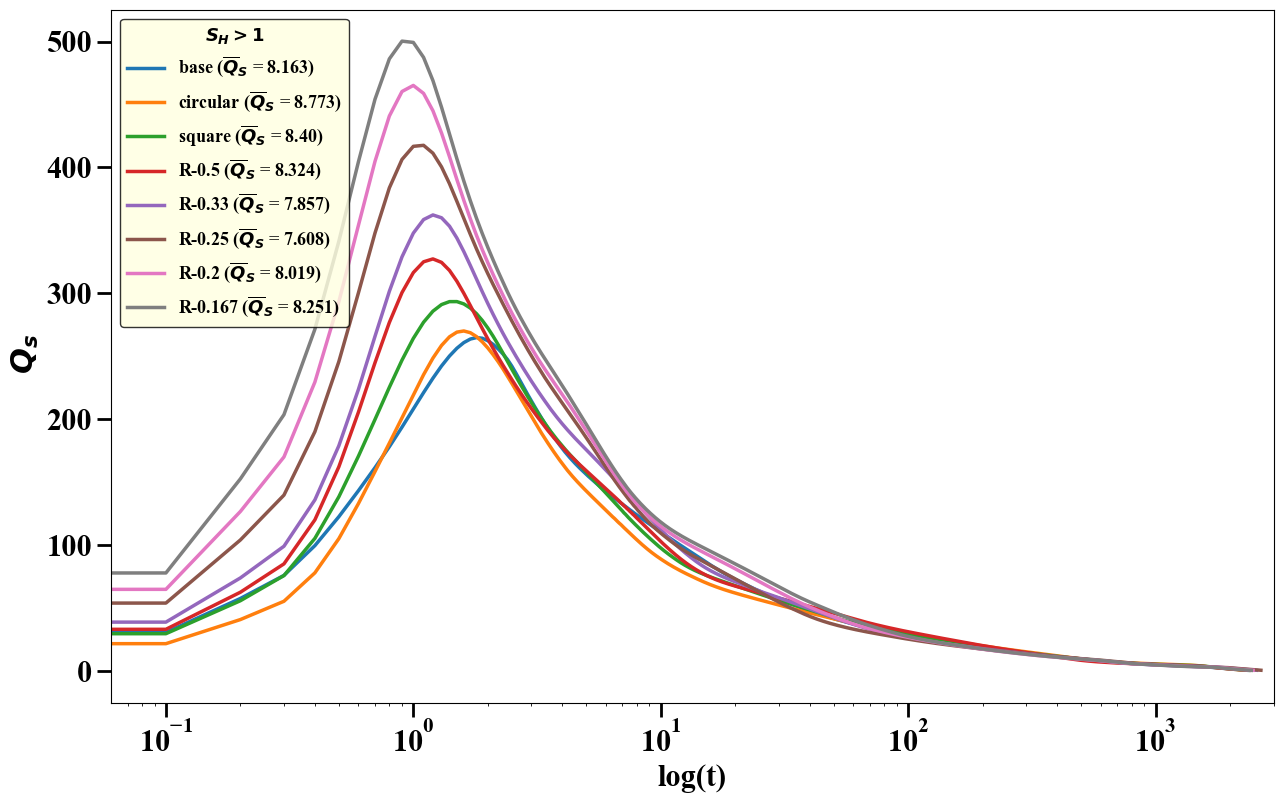

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Plot the lines for different datasets


sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base ($\overline{Q}_{S}$ = 8.163)',
             linewidth=2.5)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular ($\overline{Q}_{S}$ = 8.773)',
             linewidth=2.5)

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square ($\overline{Q}_{S}$ = 8.40)',
             linewidth=2.5)

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='R-0.5 ($\overline{Q}_{S}$ = 8.324)',
             linewidth=2.5)

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='R-0.33 ($\overline{Q}_{S}$ = 7.857)',
             linewidth=2.5)

sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='R-0.25 ($\overline{Q}_{S}$ = 7.608)',
             linewidth=2.5)

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='R-0.2 ($\overline{Q}_{S}$ = 8.019)',
             linewidth=2.5)

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='R-0.167 ($\overline{Q}_{S}$ = 8.251)',
             linewidth=2.5)



plt.tick_params(length=10, width=2)



plt.xscale('log')
# Add title and labels
plt.xlabel(r'log(t)', fontweight='bold')
plt.ylabel(r' $Q_{s}$ ', fontweight='bold')
# Adjust x-axis limits to shift lines rightward
plt.xlim(0, 3000)




# Customize the legend
plt.legend(title=r'$S_{H} > 1$', loc='upper left', fontsize=13, title_fontsize= 13,facecolor='lightyellow', frameon=True, edgecolor='black')

plt.savefig('heat-storage-full.png', dpi=400, bbox_inches='tight')
# Show the plot
plt.show()


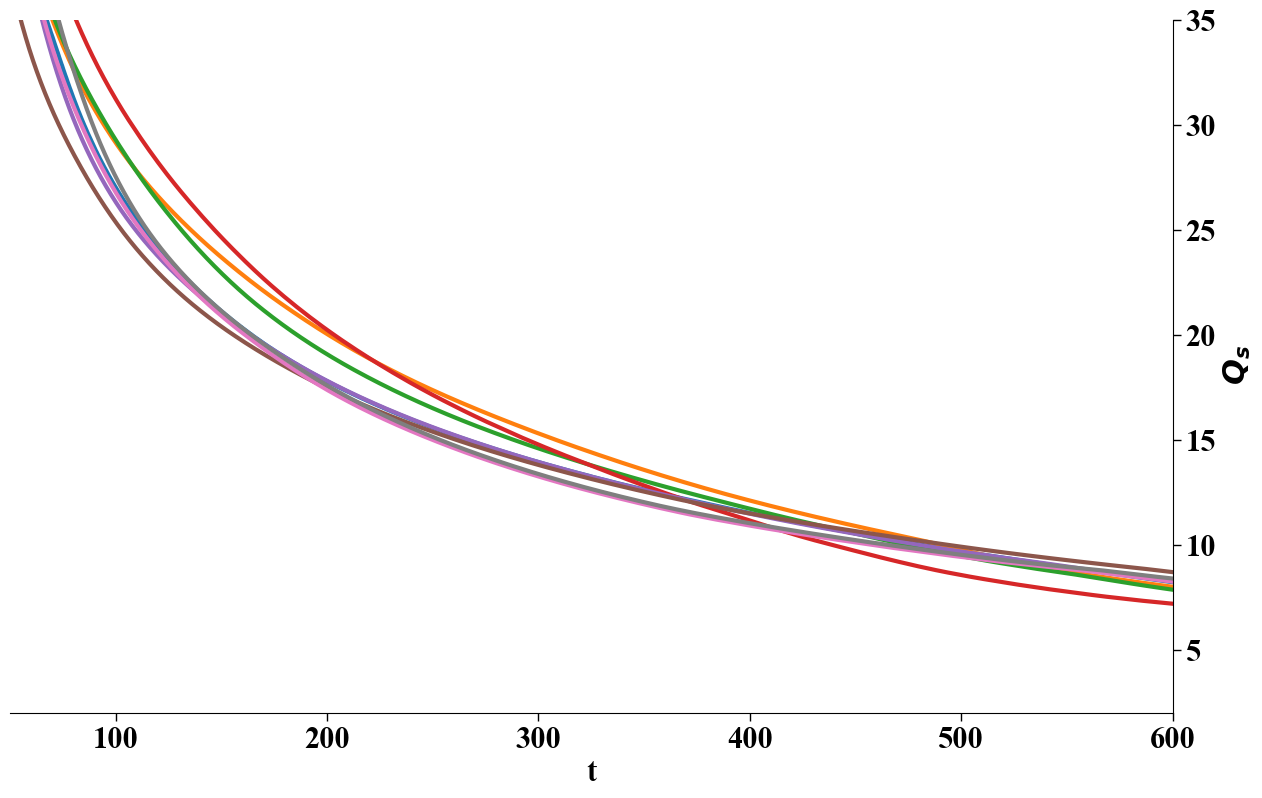

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))

# Plot the lines for different datasets
sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base ($\overline{Q}_{S}$ = 8.163)',
             linewidth=3)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular ($\overline{Q}_{S}$ = 8.773)',
             linewidth=3)

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square ($\overline{Q}_{S}$ = 8.40)',
             linewidth=3)

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='R-0.5 ($\overline{Q}_{S}$ = 8.324)',
             linewidth=3)

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='R-0.33 ($\overline{Q}_{S}$ = 7.857)',
             linewidth=3)

sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='R-0.25 ($\overline{Q}_{S}$ = 7.608)',
             linewidth=3)

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='R-0.2 ($\overline{Q}_{S}$ = 8.019)',
             linewidth=3)

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='R-0.167 ($\overline{Q}_{S}$ = 8.251)',
             linewidth=3)



# Move the y-axis to the right
plt.gca().yaxis.set_label_position('right')
plt.gca().yaxis.tick_right()
plt.tick_params(length=6, width=1)
# Add title and labels

plt.xlabel('t', fontweight='bold')
plt.ylabel(r' $Q_{s}$ ', fontweight='bold')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
# Customize the legend

plt.xlim(50, 600)
plt.ylim(2, 35)
plt.legend().remove()
plt.savefig('heat-storage-1.png', dpi=400, bbox_inches='tight')
# Show the plot
plt.show()


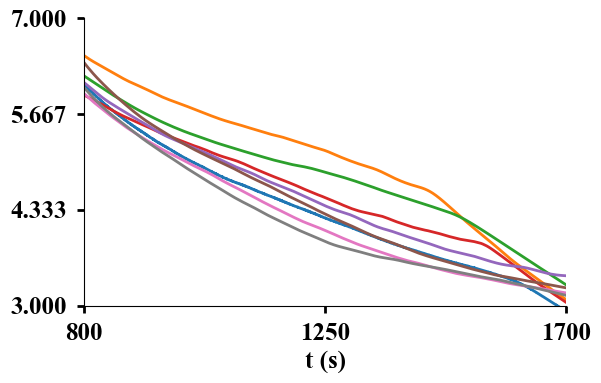

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(6.22, 3.73))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'

# Plot the lines for different datasets
sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['heat-storage-rate-flux'], 
             label='base ($\overline{Q}_{S}$ = 8.163)',
             linewidth=2)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['heat-storage-rate'], 
             label='circular ($\overline{Q}_{S}$ = 8.773)',
             linewidth=2)

sns.lineplot(x=my_file9['flow-time'], 
             y=my_file9['heat-storage-rate'], 
             label='square ($\overline{Q}_{S}$ = 8.40)',
             linewidth=2)

sns.lineplot(x=my_file8['flow-time'], 
             y=my_file8['heat-storage-rate'], 
             label='R-0.5 ($\overline{Q}_{S}$ = 8.324)',
             linewidth=2)

sns.lineplot(x=my_file5['flow-time'], 
             y=my_file5['heat-storage-rate'], 
             label='R-0.33 ($\overline{Q}_{S}$ = 7.857)',
             linewidth=2)

sns.lineplot(x=my_file3['flow-time'], 
             y=my_file3['heat-storage-rate'], 
             label='R-0.25 ($\overline{Q}_{S}$ = 7.608)',
             linewidth=2)

sns.lineplot(x=my_file6['flow-time'], 
             y=my_file6['heat-storage-rate'], 
             label='R-0.2 ($\overline{Q}_{S}$ = 8.019)',
             linewidth=2)

sns.lineplot(x=my_file7['flow-time'], 
             y=my_file7['heat-storage-rate'], 
             label='R-0.167 ($\overline{Q}_{S}$ = 8.251)',
             linewidth=2)

# Customize the background color


plt.tick_params(length=10, width=2)
# Add title and labels

plt.xlabel('t (s)', fontweight='bold')
plt.ylabel('')


y_ticks = np.linspace(3, 7, 4)
plt.yticks(y_ticks)

x_ticks = np.linspace(350, 1700, 4)  # Adjust the number of ticks as needed
plt.xticks(x_ticks)
plt.tick_params(axis='x',length=5, width=2, pad=7.5)  # Increase pad to move x-axis numbers down
plt.tick_params(axis='y',length=5, width=2, pad=7.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)







plt.xlim(800,1700)
plt.ylim(3, 7)
# Customize the legend
plt.legend().remove()
plt.savefig('heat-storage-2.png', dpi=400, bbox_inches='tight')
# Show the plot
plt.show()


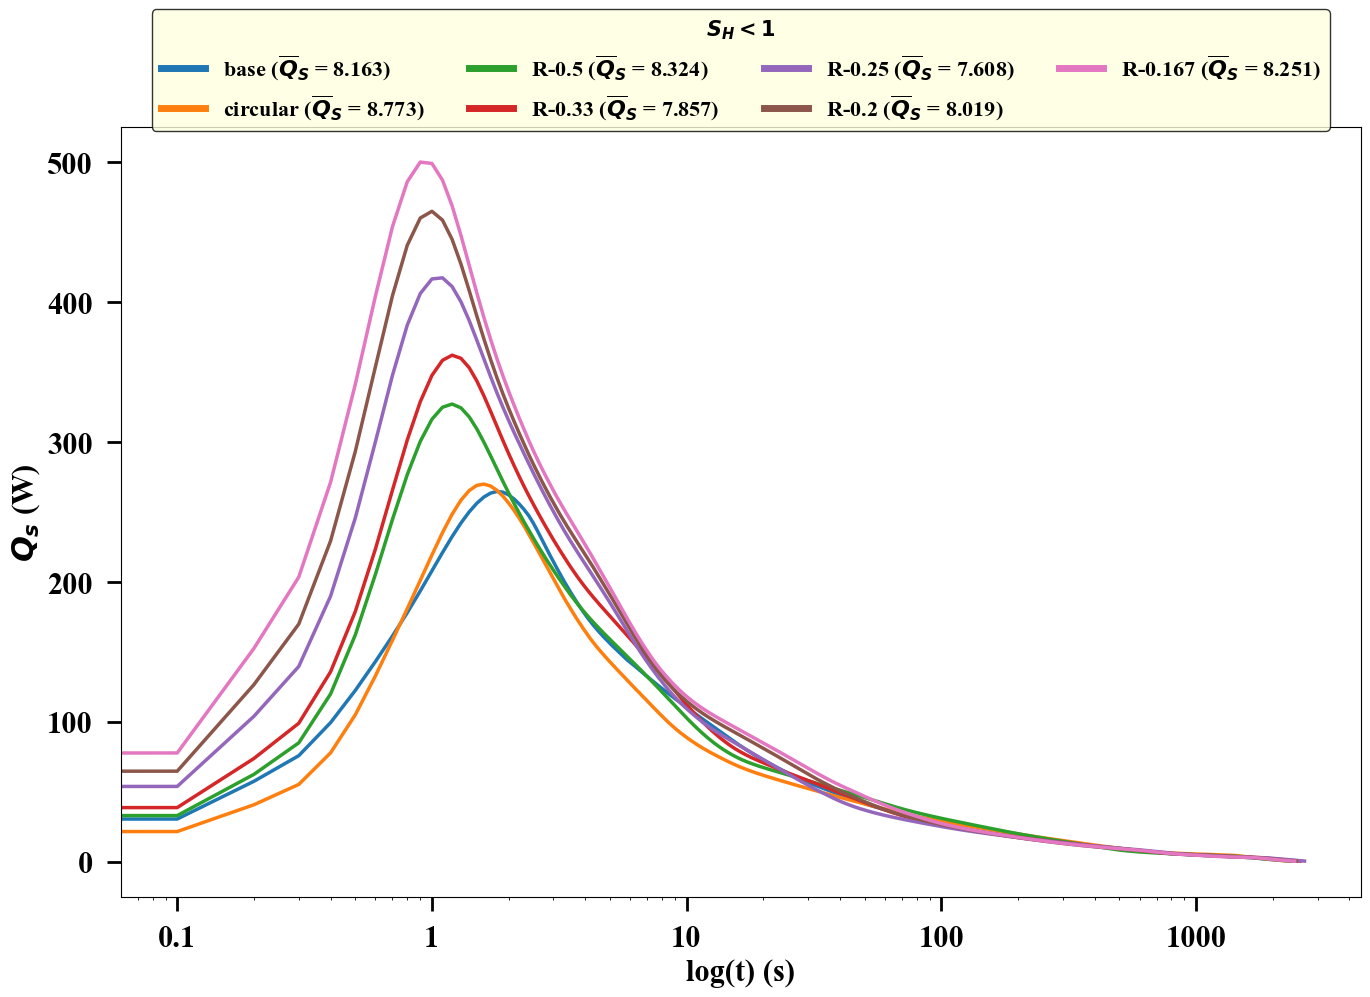

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a Seaborn figure with custom size
plt.figure(figsize=(16, 10))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Plot the lines for different datasets
sns.lineplot(x=my_file2['flow-time'], y=my_file2['heat-storage-rate-flux'], 
             label='base ($\overline{Q}_{S}$ = 8.163)', linewidth=2.5)
sns.lineplot(x=my_file4['flow-time'], y=my_file4['heat-storage-rate'], 
             label='circular ($\overline{Q}_{S}$ = 8.773)', linewidth=2.5)

sns.lineplot(x=my_file8['flow-time'], y=my_file8['heat-storage-rate'], 
             label='R-0.5 ($\overline{Q}_{S}$ = 8.324)', linewidth=2.5)
sns.lineplot(x=my_file5['flow-time'], y=my_file5['heat-storage-rate'], 
             label='R-0.33 ($\overline{Q}_{S}$ = 7.857)', linewidth=2.5)
sns.lineplot(x=my_file3['flow-time'], y=my_file3['heat-storage-rate'], 
             label='R-0.25 ($\overline{Q}_{S}$ = 7.608)', linewidth=2.5)
sns.lineplot(x=my_file6['flow-time'], y=my_file6['heat-storage-rate'], 
             label='R-0.2 ($\overline{Q}_{S}$ = 8.019)', linewidth=2.5)
sns.lineplot(x=my_file7['flow-time'], y=my_file7['heat-storage-rate'], 
             label='R-0.167 ($\overline{Q}_{S}$ = 8.251)', linewidth=2.5)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:g}'))

legend=plt.legend(
    title=r'$S_{H} < 1$', 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1675),  # Adjusts the position above the plot
    ncol=4,  # Arrange legends in multiple columns
    fontsize=16, 
    title_fontsize=15,
    facecolor='lightyellow', 
    frameon=True, 
    edgecolor='black'
)
for line in legend.get_lines():
    line.set_linewidth(5)
# Adjust tick parameters for better visuals
plt.tick_params(length=10, width=2, pad=10)

# Log scale and labels

plt.xlabel(r'log(t) (s)', fontweight='bold')
plt.ylabel(r'$Q_{s}$ (W)', fontweight='bold')


# Customize the legend and position it at the top as a header


# Save and show the plot
plt.savefig('heat-storage-full1.png', dpi=400, bbox_inches='tight')
plt.show()


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter, LogLocator
from PIL import Image


img = Image.open('heat-storage-with-vertical-inset0.png')
img.save('hast0.bmp', format='bmp')

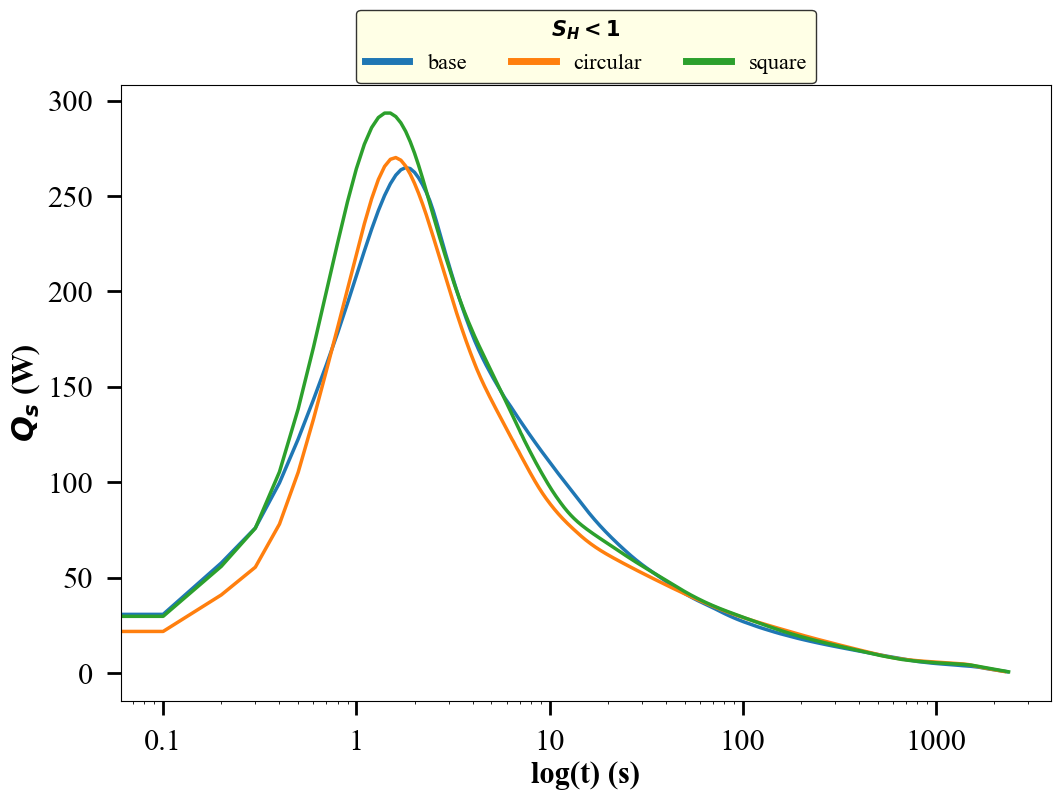

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create a Seaborn figure with custom size
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'

# Plot the lines for different datasets
sns.lineplot(x=my_file2['flow-time'], y=my_file2['heat-storage-rate-flux'], 
             label='base', linewidth=2.5)
sns.lineplot(x=my_file4['flow-time'], y=my_file4['heat-storage-rate'], 
             label='circular', linewidth=2.5)
sns.lineplot(x=my_file9['flow-time'], y=my_file9['heat-storage-rate'], 
             label='square', linewidth=2.5)


plt.xscale('log')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:g}'))

legend=plt.legend(
    title=r'$S_{H} < 1$', 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.14),  # Adjusts the position above the plot
    ncol=3,  # Arrange legends in multiple columns
    fontsize=16, 
    title_fontsize=15,
    facecolor='lightyellow', 
    frameon=True, 
    edgecolor='black'
)
for line in legend.get_lines():
    line.set_linewidth(5)
# Adjust tick parameters for better visuals
plt.tick_params(length=10, width=2, pad=10)

# Log scale and labels

plt.xlabel(r'log(t) (s)', fontweight='bold')
plt.ylabel(r'$Q_{s}$ (W)', fontweight='bold')


# Customize the legend and position it at the top as a header


# Save and show the plot
plt.savefig('heat-storage-full1.png', dpi=400, bbox_inches='tight')
plt.show()


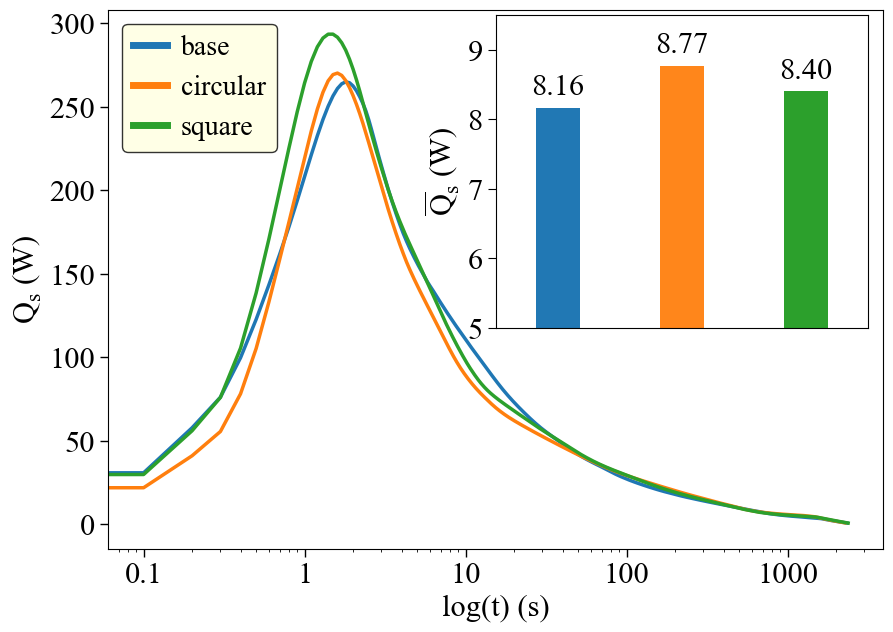

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create the figure and main axes for the line plot
fig, ax = plt.subplots(figsize=(10,7))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'

# Main line plot
sns.lineplot(ax=ax, x=my_file2['flow-time'], y=my_file2['heat-storage-rate-flux'], 
             label='base', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file4['flow-time'], y=my_file4['heat-storage-rate'], 
             label='circular', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file9['flow-time'], y=my_file9['heat-storage-rate'], 
             label='square', linewidth=2.5)

# Log scale and labels
ax.set_xscale('log')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:g}'))
ax.set_xlabel(r'log(t) (s)')
ax.set_ylabel(r'$\mathregular{Q_{s}}$ (W)')

# Legend
legend = ax.legend(
    title='', 
    loc='upper left', 
    handlelength=1.2, handletextpad=0.5,
    fontsize=20, 
    title_fontsize=15, 
    facecolor='lightyellow', 
    frameon=True, 
    edgecolor='black'
)
for line in legend.get_lines():
    line.set_linewidth(5)

# Get the position of the main axes
rect = ax.get_position()

# Define the position and size of the inset axes
inset_left = rect.x0 + 0.5 * rect.width  # Adjust horizontally
inset_bottom = rect.y0 + 0.41 * rect.height  # Adjust vertically
inset_width = 0.48 * rect.width  # Width
inset_height = 0.58 * rect.height  # Height

# Create inset axes
ax_inset = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])

# Data for the inset vertical bar plot
datasets = ['Base', 'Circular', 'Square']
ut_values = [8.163, 8.773, 8.400]
bar_width = 0.35  # Thickness of bars
ax.tick_params(axis='x', labelsize=22, length=6, width=1)  # x-axis
ax.tick_params(axis='y', labelsize=22, length=6, width=1)
# Plot vertical bar chart
bars = ax_inset.bar(datasets, ut_values, width=bar_width, color=['#2178b4', '#ff861b', '#2ca02c'])

# Annotate bars with values
for bar, value in zip(bars, ut_values):
    ax_inset.text(bar.get_x() + bar.get_width() / 2, value + 0.1, 
                  f'{value:.2f}', ha='center', va='bottom', fontsize=22, color='black')

# Set axes properties for the inset
ax_inset.set_ylabel(r'$\mathregular{\overline{Q}_{s}}$ (W)', fontsize=22)

# Set x and y limits for the inset plot
ax_inset.set_xlim(-0.5, 2.5)  # Adjust x-axis limits (e.g., for spacing around bars)
ax_inset.set_ylim(5, 9.5)  # Adjust y-axis limits (e.g., to zoom in on bar heights)
ax_inset.set_xticklabels([])

# Customize tick parameters
ax_inset.tick_params(axis='x', labelsize=22)
ax_inset.tick_params(axis='y', labelsize=22)
ax_inset.tick_params(axis='y', length=6)
ax_inset.tick_params(axis='x', length=0)

# Save and show the plot
plt.savefig('heat-storage-with-vertical-inset0.png', dpi=400, bbox_inches='tight')
plt.show()


In [26]:
datasets = ['Base', 'Circular', 'Square']
ut_values = [8.163, 8.773, 8.400]
bar_width = 0.35  # Thickness of bars
# Plot horizontal bar plot for Ut values
bars = ax_inset.barh(datasets, ut_values, color=['#2178b4', '#ff861b', '#2ca02c'])

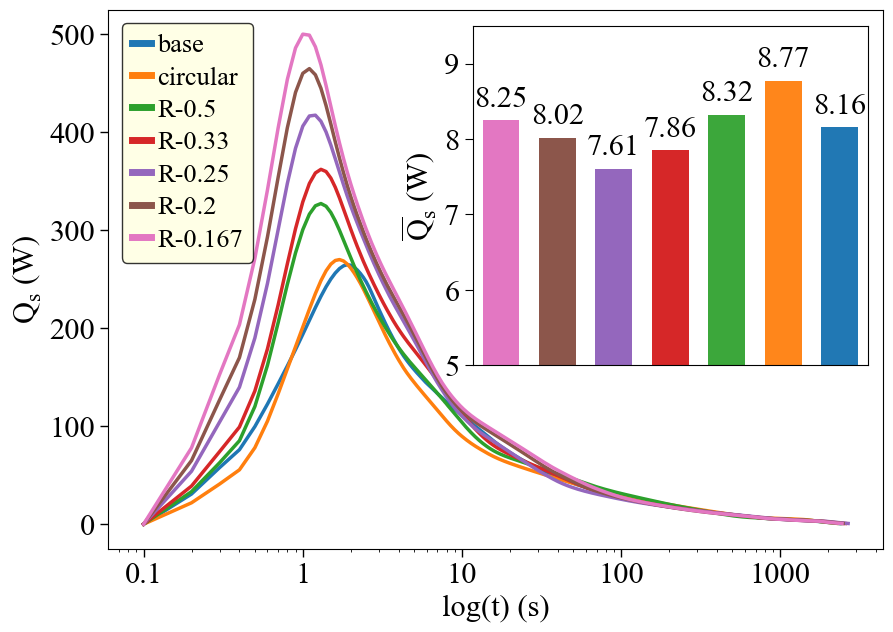

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create the figure and main axes for the line plot
fig, ax = plt.subplots(figsize=(10,7))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'

# Add a small offset to the x-data of each line
offset = 0.1  # Adjust this value as needed
sns.lineplot(ax=ax, x=my_file2['flow-time'] + offset, y=my_file2['heat-storage-rate-flux'], 
             label='base', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file4['flow-time'] + offset, y=my_file4['heat-storage-rate'], 
             label='circular', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file8['flow-time'] + offset, y=my_file8['heat-storage-rate'], 
             label='R-0.5', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file5['flow-time'] + offset, y=my_file5['heat-storage-rate'], 
             label='R-0.33', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file3['flow-time'] + offset, y=my_file3['heat-storage-rate'], 
             label='R-0.25', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file6['flow-time'] + offset, y=my_file6['heat-storage-rate'], 
             label='R-0.2', linewidth=2.5)
sns.lineplot(ax=ax, x=my_file7['flow-time'] + offset, y=my_file7['heat-storage-rate'], 
             label='R-0.167', linewidth=2.5)


# Log scale and labels
ax.set_xscale('log')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:g}'))
ax.set_xlabel(r'log(t) (s)')
ax.set_ylabel(r'$\mathregular{Q_{s}}$ (W)')

# Legend
legend=plt.legend(
    title=r'', 
    loc='upper left',
    handlelength=0.7, handletextpad=0.25,
    
    fontsize=19, 
    title_fontsize=15,
    facecolor='lightyellow', 
    frameon=True, 
    edgecolor='black',
    columnspacing=0.4,
    labelspacing=0.3
)
for line in legend.get_lines():
    line.set_linewidth(5)

# Get the position of the main axes
rect = ax.get_position()

# Define the position and size of the inset axes
inset_left = rect.x0 + 0.47 * rect.width  # Adjust horizontally
inset_bottom = rect.y0 + 0.34 * rect.height  # Adjust vertically
inset_width = 0.51 * rect.width  # Width
inset_height = 0.63 * rect.height  # Height

# Create inset axes
ax_inset = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])

# Data for the inset vertical bar plot
datasets = ['R-0.167', 'R-0.2', 'R-0.25', 'R-0.33', 'R-0.5', 'Circular','Base']
ut_values = [8.251, 8.019, 7.608, 7.857, 8.324, 8.773, 8.163]

ax.tick_params(axis='x', labelsize=22, length=6, width=1)  # x-axis
ax.tick_params(axis='y', labelsize=22, length=6, width=1)
# Plot vertical bar chart
bars = ax_inset.bar(datasets, ut_values, width=0.65, color=['#e377c2','#8c564b','#9467bd','#d62728','#3ca73b', '#ff861b','#2178b4'])

# Annotate bars with values
for bar, value in zip(bars, ut_values):
    ax_inset.text(bar.get_x() + bar.get_width() / 2, value + 0.1, 
                  f'{value:.2f}', ha='center', va='bottom', fontsize=22, color='black')

# Set axes properties for the inset
ax_inset.set_ylabel(r'$\mathregular{\overline{Q}_{s}}$ (W)', fontsize=22)

# Set x and y limits for the inset plot
ax_inset.set_xlim(-0.5, len(datasets) - 0.5)  # Adjust x-axis limits to fit all bars
ax_inset.set_ylim(5, 9.5)  # Adjust y-axis limits

# Hide x-axis ticks and labels
ax_inset.set_xticks(range(len(datasets)))  # Set correct positions for x-axis ticks
ax_inset.set_xticklabels(datasets)  # Use dataset names as labels
ax_inset.set_xticklabels([])
ax_inset.tick_params(axis='x', length=0)

ax_inset.tick_params(axis='y', length=6)
# Customize tick parameters for y-axis
ax_inset.tick_params(axis='y', labelsize=22)

# Save and show the plot
plt.savefig('heat-storage-with-vertical-inset2.png', dpi=400, bbox_inches='tight')
plt.show()
